In [1]:
import pandas as pd
from tqdm import tqdm
from pyarrow import csv
import pyarrow as pa

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from catboost import CatBoostClassifier
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve

In [2]:
def get_data(filename, scaler=None, useScaler=False):
    df = pd.read_csv(filename)
    Y = df.Label
    df = df.drop(['Unnamed: 0', 'Label'], axis=1)

    df['Attack'] = df['Attack'].astype("string")

    X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3,stratify=df.Attack, random_state=42)
    del df
    del Y

    attack_train = X_train['Attack']
    X_train = X_train.drop('Attack', axis=1)
    attack_test = X_test['Attack']
    X_test = X_test.drop('Attack', axis=1)

    X_train = X_train.drop(['SimillarHTTP'], axis=1)
    X_train[X_train['Flow Bytes/s'] == np.inf] = 0
    X_train[X_train[' Flow Packets/s'] == np.inf] = 0

    X_test = X_test.drop(['SimillarHTTP'], axis=1)
    X_test[X_test['Flow Bytes/s'] == np.inf] = 0
    X_test[X_test[' Flow Packets/s'] == np.inf] = 0

    
    if useScaler:
        X_train = scaler.transform(X_train)
    else:
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test, attack_train, attack_test, scaler

In [3]:
X_train, X_test, y_train, y_test, attack_train, attack_test, scaler = get_data('triple.csv')

/tmp/ipykernel_4278/3331398274.py:2: DtypeWarning: Columns (62,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [4]:
y_test

1856763    0
712274     0
1483074    0
101751     0
1853696    0
          ..
2442436    0
1149877    0
675851     0
876316     0
1791289    0
Name: Label, Length: 746167, dtype: int64

In [7]:
clf = CatBoostClassifier(random_seed=52, iterations=10)
clf.fit(X_train, y_train, verbose = False, early_stopping_rounds=100) 

In [8]:
accuracy_score(y_test, clf.predict(X_test))

0.9961630573316698

In [10]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test)).ravel()

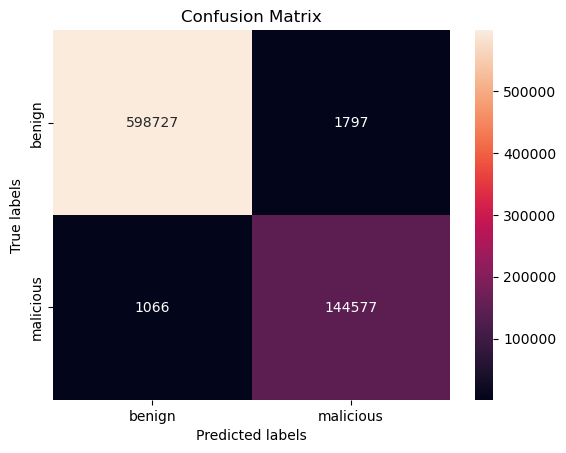

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap([[tn, fp],[fn, tp]], annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['benign', 'malicious']); ax.yaxis.set_ticklabels(['benign', 'malicious']);

In [8]:
del X_train, y_train, attack_train

In [9]:
X_train, _, y_train, _, attack_train, _, _ = get_data('double.csv', scaler=scaler, useScaler=True)

/tmp/ipykernel_34875/3331398274.py:2: DtypeWarning: Columns (62,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [10]:
clf = CatBoostClassifier(random_seed=42, depth=4, custom_metric=['AUC'], iterations=1000, learning_rate=0.2, subsample=0.95, bootstrap_type='Bernoulli')
clf.fit(X_train, y_train, verbose = False, early_stopping_rounds=100) 

In [11]:
accuracy_score(y_test, clf.predict(X_test))

0.9611936738022453

In [12]:
del X_train, y_train, attack_train

In [13]:
X_train, _, y_train, _, attack_train, _, _ = get_data('single.csv', scaler=scaler, useScaler=True)

In [14]:
clf = CatBoostClassifier(random_seed=42, depth=4, custom_metric=['AUC'], iterations=1000, learning_rate=0.2, subsample=0.95, bootstrap_type='Bernoulli')
clf.fit(X_train, y_train, verbose = False, early_stopping_rounds=100) 

In [15]:
accuracy_score(y_test, clf.predict(X_test))

0.9813526998647756

In [16]:
del X_train, y_train, attack_train

In [17]:
X_train, X_test, y_train, y_test, attack_train, attack_test, scaler = get_data('single.csv', scaler=scaler, useScaler=True)

In [18]:
clf = CatBoostClassifier(random_seed=42, depth=4, custom_metric=['AUC'], iterations=1000, learning_rate=0.2, subsample=0.95, bootstrap_type='Bernoulli')
clf.fit(X_train, y_train, verbose = False, early_stopping_rounds=100) 

In [19]:
accuracy_score(y_test, clf.predict(X_test))

0.996941398332953

In [20]:
del X_train, y_train, attack_train

In [22]:
X_train, _, y_train, _, attack_train, attack_test, scaler = get_data('triple.csv', scaler=scaler, useScaler=True)

/tmp/ipykernel_34875/3331398274.py:2: DtypeWarning: Columns (62,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [23]:
clf = CatBoostClassifier(random_seed=42, depth=4, custom_metric=['AUC'], iterations=1000, learning_rate=0.2, subsample=0.95, bootstrap_type='Bernoulli')
clf.fit(X_train, y_train, verbose = False, early_stopping_rounds=100) 

In [24]:
accuracy_score(y_test, clf.predict(X_test))

0.9968541535240192